In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
import json
import datetime
from scipy import stats
import plotly
from plotly.graph_objs import Scatter, Layout

In [23]:
def GroupColFunc(row):
    week = datetime.date(row['Year'], row['Month'], row['DayofMonth']).isocalendar()[1]
    if (row['Month'] == 1 and week > 50):
        return 1.0
    else:
        if (row['Month'] == 12 and week == 1):
            return 53.0
        else:
            return week

In [24]:
def GenerateDataWithWeeks(years):
    for year in years:
        df = pd.read_csv(year+'.csv')
        woyserie = df.apply(lambda row: GroupColFunc(row), axis=1)
        df = df.assign(WeekOfYear= woyserie)
        df.to_csv(year+'wy.csv')

/home/ignacio/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



In [17]:
def plotCancellationCodesBy(df, index):  
    # (A = carrier, B = weather, C = NAS, D = security)
    var = df[df.Cancelled > 0].groupby([index,'CancellationCode'])[index].count() / df.groupby([index])[index].count()
    var.unstack().plot(kind='bar',stacked=True, color=['red','blue','green','pink'], grid=False)
    plt.show()

In [130]:
years = ['2003','2004','2005','2006','2007','2008']
cancelledW = pd.Series()
totalW = pd.Series()
cancelledM = pd.Series()
totalM = pd.Series()
for year in years:
    df = pd.read_csv(year+'wy.csv')
    #_Cancelados Por Semana
    serCW = df[df.Cancelled > 0].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    cancelledW = cancelledW.append(serCW)
    #_Vuelos Totales Por Semana
    serTW = df.groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    totalW = total.append(serTW)
    #_Cancelados Por Mes
    serCM = df[df.Cancelled > 0].groupby(['Year','Month'])['Month'].count()
    cancelledM = cancelledM.append(serCM)
    #_Vuelos Totales Por Mes
    serTM = df.groupby(['Year','Month'])['Month'].count()
    totalM = totalM.append(serTM)

/home/ignacio/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



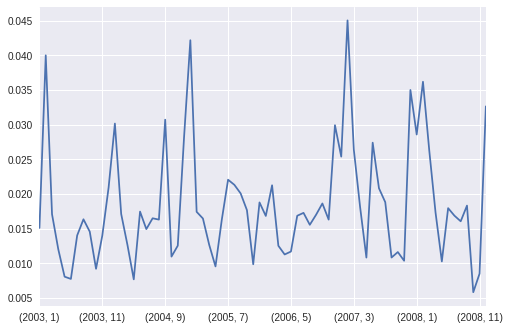

In [132]:
(cancelledM/totalM).plot(kind='line').grid('on', which='minor', axis='x' )
plt.show()

(2003, 1)     0.015108
(2003, 2)     0.039986
(2003, 3)     0.017081
(2003, 4)     0.012012
(2003, 5)     0.008080
(2003, 6)     0.007756
(2003, 7)     0.014027
(2003, 8)     0.016354
(2003, 9)     0.014574
(2003, 10)    0.009217
(2003, 11)    0.014024
(2003, 12)    0.020940
(2004, 1)     0.030156
(2004, 2)     0.017118
(2004, 3)     0.012642
(2004, 4)     0.007693
(2004, 5)     0.017463
(2004, 6)     0.014939
(2004, 7)     0.016497
(2004, 8)     0.016310
(2004, 9)     0.030710
(2004, 10)    0.010975
(2004, 11)    0.012550
(2004, 12)    0.028190
(2005, 1)     0.042163
(2005, 2)     0.017430
(2005, 3)     0.016467
(2005, 4)     0.012670
(2005, 5)     0.009559
(2005, 6)     0.016277
                ...   
(2006, 7)     0.017280
(2006, 8)     0.015560
(2006, 9)     0.017010
(2006, 10)    0.018634
(2006, 11)    0.016305
(2006, 12)    0.029919
(2007, 1)     0.025383
(2007, 2)     0.045023
(2007, 3)     0.026403
(2007, 4)     0.018121
(2007, 5)     0.010831
(2007, 6)     0.027401
(2007, 7)  

In [124]:
df = pd.read_csv('2008wy.csv')
    #_Cancelados Por Semana
serCW = df[df.Cancelled > 0].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()